DATASET : https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
sms = pd.read_csv('spam.csv', encoding = "ISO-8859-1")
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
sms.shape

(5572, 5)

## DATA CLEANING

In [4]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Dropping Last 3 Columns
sms = sms[['v1', 'v2']]

In [6]:
sms

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
# Renaming The Columns
sms.rename(columns={'v1': 'target',
                    'v2': 'text'}, inplace=True)
sms

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
sms['target'] = encoder.fit_transform(sms['target'])

sms

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
sms.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
sms.duplicated().sum()

403

In [11]:
# Removing The Duplicates
sms = sms.drop_duplicates(keep='first')
sms.shape

(5169, 2)

## EDA

In [12]:
sms['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

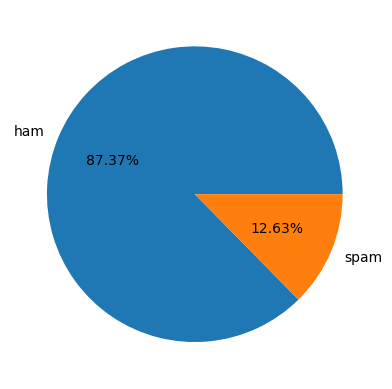

In [13]:
import matplotlib.pyplot as plt
plt.pie(sms['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f%%');

We have an imbalanced dataset.

In [15]:
!pip install nltk

     ---------------------------------------- 1.5/1.5 MB 989.4 kB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 kB 1.5 MB/s eta 0:00:00
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
     -------------------------------------- 267.7/267.7 kB 1.0 MB/s eta 0:00:00


In [16]:
import nltk

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\astro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
# Fetching The Number Of Characters
sms['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [19]:
sms['character_count'] = sms['text'].apply(len)

C:\Users\astro\AppData\Local\Temp\ipykernel_20168\2260612507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms['character_count'] = sms['text'].apply(len)


In [20]:
sms

,target,text,character_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [21]:
# Fetching The Number Of Words
sms['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [22]:
sms['word_count'] = sms['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\astro\AppData\Local\Temp\ipykernel_20168\3121915205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms['word_count'] = sms['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [23]:
sms.head()

,target,text,character_count,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
# Fetching The Number Of Sentences
sms['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [25]:
sms['sentences_count'] = sms['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\astro\AppData\Local\Temp\ipykernel_20168\790509533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms['sentences_count'] = sms['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [26]:
sms.head()

,target,text,character_count,word_count,sentences_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
sms[['character_count', 'word_count', 'sentences_count']].describe()

,character_count,word_count,sentences_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# Statistical Description Of ham Messages
sms[sms['target'] == 0][['character_count', 'word_count', 'sentences_count']].describe()

,character_count,word_count,sentences_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
# Statistical Description Of spam Messages
sms[sms['target'] == 1][['character_count', 'word_count', 'sentences_count']].describe()

,character_count,word_count,sentences_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [30]:
import seaborn as sns

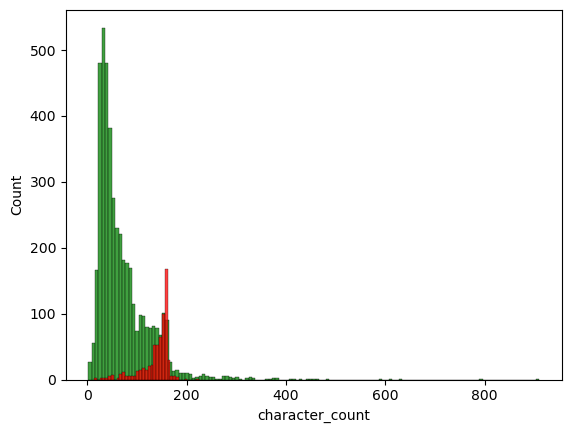

In [31]:
sns.histplot(sms[sms['target'] == 0]['character_count'], color='green');
sns.histplot(sms[sms['target'] == 1]['character_count'], color='red');

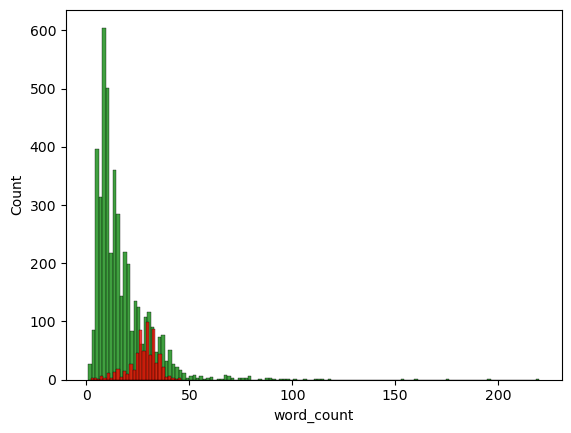

In [32]:
sns.histplot(sms[sms['target'] == 0]['word_count'], color='green');
sns.histplot(sms[sms['target'] == 1]['word_count'], color='red');

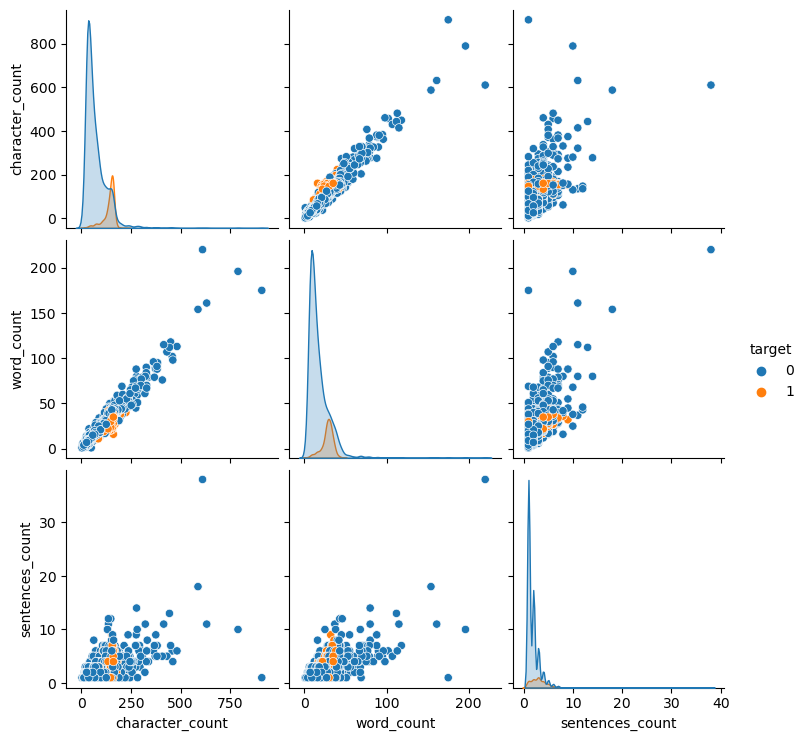

In [33]:
sns.pairplot(sms, hue='target');

C:\Users\astro\AppData\Local\Temp\ipykernel_20168\829786454.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sms.corr(), annot=True);


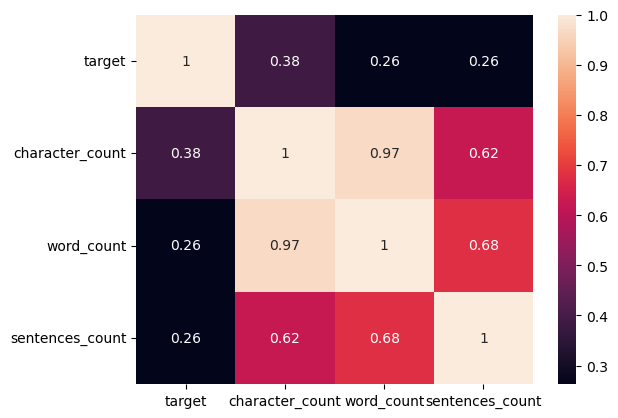

In [34]:
sns.heatmap(sms.corr(), annot=True);

## TEXT PREPROCESSING

1. Lower Case
2. Tokenization
3. Removing Special Characters (if any)
4. Removing StopWords And Punctuation
5. Stemming (or Lemmitization)

In [35]:
from nltk.corpus import stopwords
nltk.download('stopwords')
#stopwords.words('english')
import string
#string.punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\astro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
     if i.isalnum():
       y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return ' '.join(y)

In [37]:
sms['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [38]:
sms['transformed_text'] = sms['text'].apply(transform_text)

C:\Users\astro\AppData\Local\Temp\ipykernel_20168\860222750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms['transformed_text'] = sms['text'].apply(transform_text)


In [39]:
sms.head()

,target,text,character_count,word_count,sentences_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


WORDCOUNT PLOT

In [40]:
! pip install wordcloud

     ------------------------------------ 153.1/153.1 kB 285.6 kB/s eta 0:00:00


In [41]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

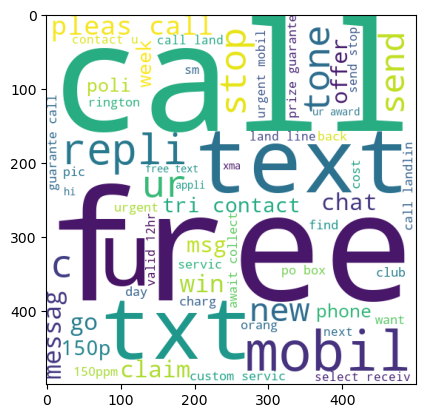

In [42]:
spam_wc = wc.generate(sms[sms['target'] == 1]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc);

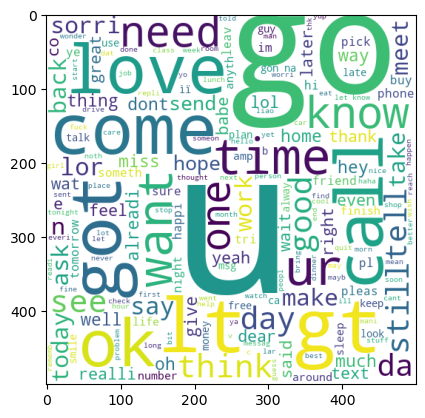

In [43]:
ham_wc = wc.generate(sms[sms['target'] == 0]['transformed_text'].str.cat(sep=' '))
plt.imshow(ham_wc);

In [44]:
spam_corpus = []
for msg in sms[sms['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [45]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [47]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [48]:
ham_corpus = []
for msg in sms[sms['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

C:\Users\astro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


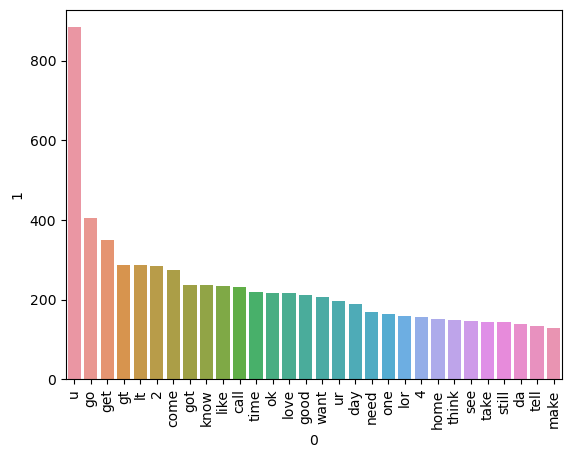

In [54]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## MODEL BUILDING

### VECTORIZATION : BagOfWords

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [50]:
X = cv.fit_transform(sms['transformed_text']).toarray()

In [51]:
y = sms['target']

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [53]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

GAUSSIAN NAIVE BAYES

In [54]:
# Training
gnb.fit(X_train, y_train)

# Prediction
y_pred_gnb = gnb.predict(X_test)

# Accuracy Score
acc_gnb = accuracy_score(y_test, y_pred_gnb)
print(f'The Accuracy Score Of GaussianNB :\n {acc_gnb}')

# Confusion MAtrix
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
print(f'The Confusion Matrix Of GaussianNB :\n {conf_matrix_gnb}')

# Precision Score
precision_gnb = precision_score(y_test, y_pred_gnb)
print(f'The Precision Score Of GaussianNB :\n {precision_gnb}')

The Accuracy Score Of GaussianNB :
 0.8800773694390716
The Confusion Matrix Of GaussianNB :
 [[792 104]
 [ 20 118]]
The Precision Score Of GaussianNB :
 0.5315315315315315


MULTINOMIAL NAIVE BAYES

In [55]:
# Training
mnb.fit(X_train, y_train)

# Prediction
y_pred_mnb = mnb.predict(X_test)

# Accuracy Score
acc_mnb = accuracy_score(y_test, y_pred_mnb)
print(f'The Accuracy Score Of MultinomialNB :\n {acc_mnb}')

# Confusion MAtrix
conf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb)
print(f'The Confusion Matrix Of MultinomialNB :\n {conf_matrix_mnb}')

# Precision Score
precision_mnb = precision_score(y_test, y_pred_mnb)
print(f'The Precision Score Of MultinomialNB :\n {precision_mnb}')

The Accuracy Score Of MultinomialNB :
 0.9642166344294004
The Confusion Matrix Of MultinomialNB :
 [[871  25]
 [ 12 126]]
The Precision Score Of MultinomialNB :
 0.8344370860927153


BERNOULLI NAIVE BAYES

In [56]:
# Training
bnb.fit(X_train, y_train)

# Prediction
y_pred_bnb = bnb.predict(X_test)

# Accuracy Score
acc_bnb = accuracy_score(y_test, y_pred_bnb)
print(f'The Accuracy Score Of BernoulliNB :\n {acc_bnb}')

# Confusion MAtrix
conf_matrix_bnb = confusion_matrix(y_test, y_pred_bnb)
print(f'The Confusion Matrix Of BernoullilNB :\n {conf_matrix_bnb}')

# Precision Score
precision_bnb = precision_score(y_test, y_pred_bnb)
print(f'The Precision Score Of BernoulliNB :\n {precision_bnb}')

The Accuracy Score Of BernoulliNB :
 0.9700193423597679
The Confusion Matrix Of BernoullilNB :
 [[893   3]
 [ 28 110]]
The Precision Score Of BernoulliNB :
 0.9734513274336283


### VECTORIZATION : TfidfVectorizer

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [58]:
X = tfidf.fit_transform(sms['transformed_text']).toarray()
y = sms['target']

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [60]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

GAUSSIAN NAIVE BAYES

In [61]:
# Training
gnb.fit(X_train, y_train)

# Prediction
y_pred_gnb = gnb.predict(X_test)

# Accuracy Score
acc_gnb = accuracy_score(y_test, y_pred_gnb)
print(f'The Accuracy Score Of GaussianNB :\n {acc_gnb}')

# Confusion MAtrix
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
print(f'The Confusion Matrix Of GaussianNB :\n {conf_matrix_gnb}')

# Precision Score
precision_gnb = precision_score(y_test, y_pred_gnb)
print(f'The Precision Score Of GaussianNB :\n {precision_gnb}')

The Accuracy Score Of GaussianNB :
 0.8694390715667312
The Confusion Matrix Of GaussianNB :
 [[788 108]
 [ 27 111]]
The Precision Score Of GaussianNB :
 0.5068493150684932


MULTINOMIAL NAIVE BAYES

In [62]:
# Training
mnb.fit(X_train, y_train)

# Prediction
y_pred_mnb = mnb.predict(X_test)

# Accuracy Score
acc_mnb = accuracy_score(y_test, y_pred_mnb)
print(f'The Accuracy Score Of MultinomialNB :\n {acc_mnb}')

# Confusion MAtrix
conf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb)
print(f'The Confusion Matrix Of MultinomialNB :\n {conf_matrix_mnb}')

# Precision Score
precision_mnb = precision_score(y_test, y_pred_mnb)
print(f'The Precision Score Of MultinomialNB :\n {precision_mnb}')

The Accuracy Score Of MultinomialNB :
 0.9709864603481625
The Confusion Matrix Of MultinomialNB :
 [[896   0]
 [ 30 108]]
The Precision Score Of MultinomialNB :
 1.0


BERNOULLI NAIVE BAYES

In [63]:
# Training
bnb.fit(X_train, y_train)

# Prediction
y_pred_bnb = bnb.predict(X_test)

# Accuracy Score
acc_bnb = accuracy_score(y_test, y_pred_bnb)
print(f'The Accuracy Score Of BernoulliNB :\n {acc_bnb}')

# Confusion MAtrix
conf_matrix_bnb = confusion_matrix(y_test, y_pred_bnb)
print(f'The Confusion Matrix Of BernoullilNB :\n {conf_matrix_bnb}')

# Precision Score
precision_bnb = precision_score(y_test, y_pred_bnb)
print(f'The Precision Score Of BernoulliNB :\n {precision_bnb}')

The Accuracy Score Of BernoulliNB :
 0.9835589941972921
The Confusion Matrix Of BernoullilNB :
 [[895   1]
 [ 16 122]]
The Precision Score Of BernoulliNB :
 0.991869918699187


## EVALUATION

In [64]:
! pip install xgboost

  Using cached xgboost-1.7.2-py3-none-win_amd64.whl (89.1 MB)


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [66]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gdbt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [68]:
clfs = {
    'LR': lrc,
    'SVC' : svc,
    'MNB': mnb,
    'DTC': dtc,
    'KNC' : knc, 
    'RFC': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GDBT':gdbt,
    'xgb':xgb
}

In [69]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy, precision

In [70]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print("For ", name)
    print("Accuracy : ", current_accuracy)
    print("Precision : ", current_precision)
    print('\n')
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  LR
Accuracy :  0.9584139264990329
Precision :  0.9702970297029703


For  SVC
Accuracy :  0.9758220502901354
Precision :  0.9747899159663865


For  MNB
Accuracy :  0.9709864603481625
Precision :  1.0


For  DTC
Accuracy :  0.9274661508704062
Precision :  0.8118811881188119


For  KNC
Accuracy :  0.9052224371373307
Precision :  1.0


For  RFC
Accuracy :  0.9758220502901354
Precision :  0.9829059829059829


For  AdaBoost
Accuracy :  0.960348162475822
Precision :  0.9292035398230089


For  BgC
Accuracy :  0.9584139264990329
Precision :  0.8682170542635659


For  ETC
Accuracy :  0.9748549323017408
Precision :  0.9745762711864406


For  GDBT
Accuracy :  0.9468085106382979
Precision :  0.9191919191919192


For  xgb
Accuracy :  0.9671179883945842
Precision :  0.9333333333333333




In [71]:
performance_df = pd.DataFrame({'Algorithms':clfs.keys(),
                               'Accuracy':accuracy_scores,
                               'Precision':precision_scores}).sort_values('Precision', ascending=False)
performance_df

,Algorithms,Accuracy,Precision
2,MNB,0.970986,1.000000
4,KNC,0.905222,1.000000
5,RFC,0.975822,0.982906
1,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
0,LR,0.958414,0.970297
10,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GDBT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [73]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithms")
performance_df1

,Algorithms,variable,value
0,MNB,Accuracy,0.970986
1,KNC,Accuracy,0.905222
2,RFC,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,AdaBoost,Accuracy,0.960348
8,GDBT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


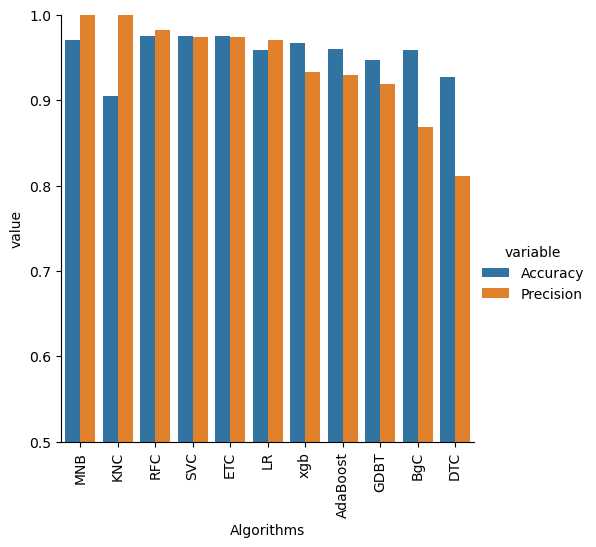

In [74]:
sns.catplot(x='Algorithms', y='value', hue ='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### SAVING THE MODEL

In [75]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))